**Дистрибутивная семантика (distributional semantics)** — область компьютерной лингвистики, занимающаяся изучением "смысла" слов или n-грамм через распределения в больших корпусах текстов.

Сама идея дистрибутивной семантики достаточно стара и была популяризована английским лингвистом Джоном Фертом в 1950-е годы. Она следует так называемой **"дистрибутивной гипотезе"**: слова, встречающиеся в схожих контекстах, имеют близкие значения. Словами самого Ферта, "a word is characterized by the company it keeps". Иллюстрация из Википедии:

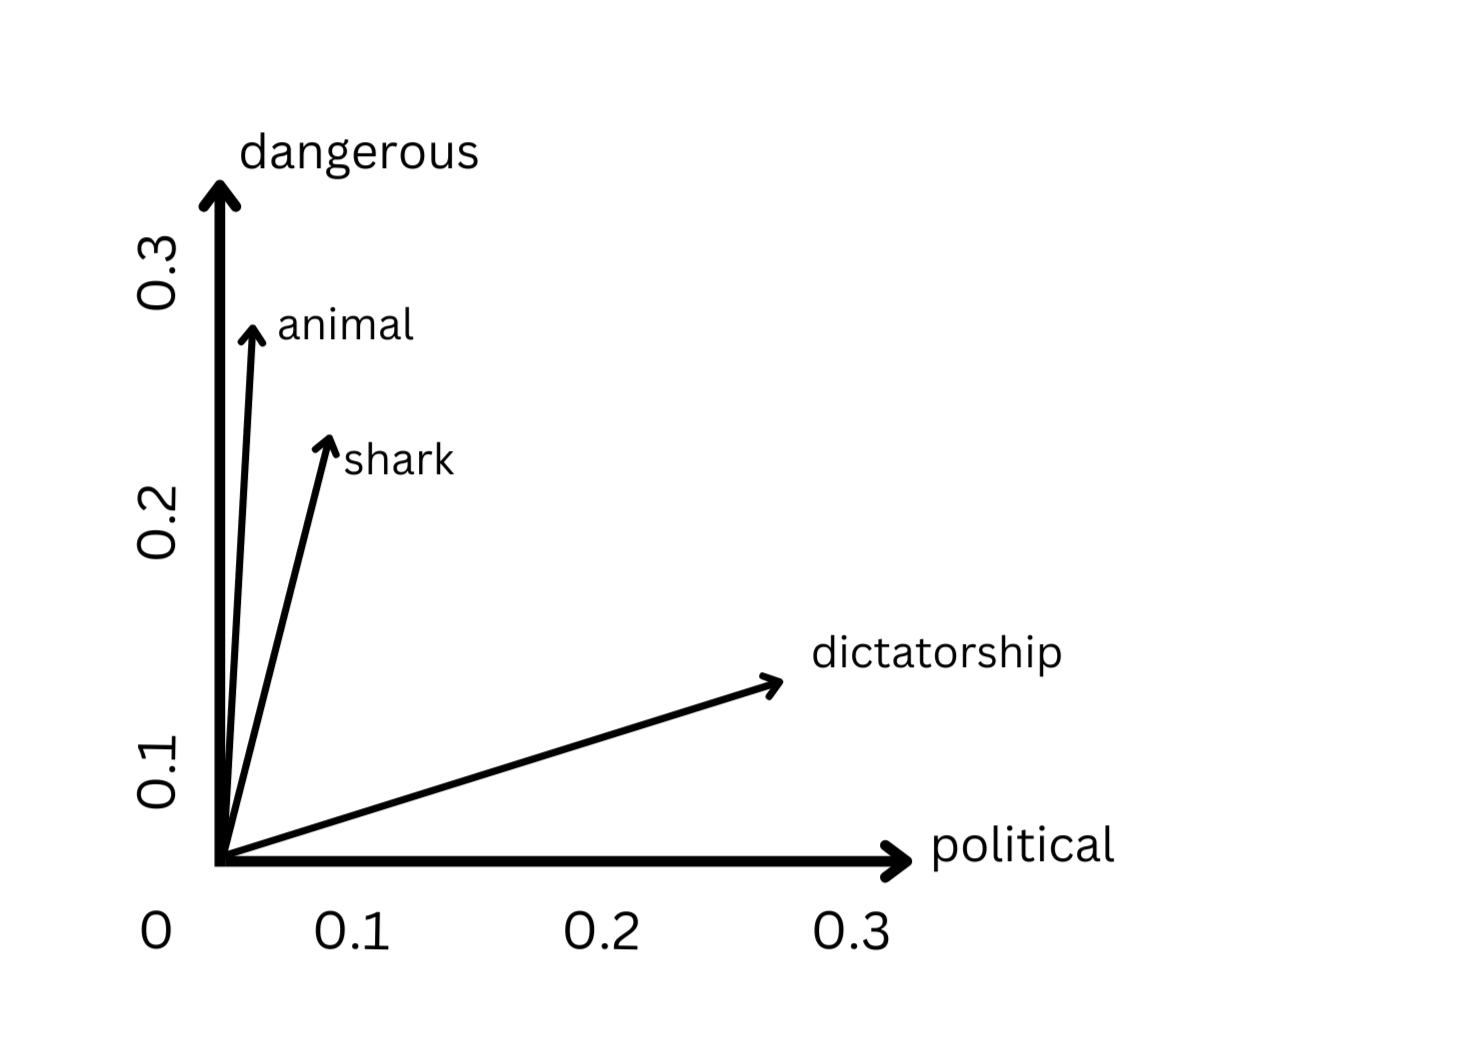

Изучение синонимии, антонимии, гиперонимии давно входит в круг интересов семантики; в целом в современной считается, что у слов самих по себе значений нет, значения приобретаются в контексте, т.е. в употреблении. Например:  
<i>In isolation, many individual words are ambiguous or indeterminate in meaning, but this hardly ever troubles us in practice, because the phrases in which they occur are not ambiguous. <...> It is not the words which tell you the meaning of the phrase, but the phrase which tells you the meaning of the individual word in it.</i>

**Words and Phrases, Michael Stubbs 2002, pp. 13-14**

Из этого следует важнее для понимания концепции дистрибутивной семантики словосочетание — **семантические ассоциаты**, т.е. такие слова (и словосочетания), которые не обязательно являются синонимами/антонимами, но употребляются в похожих контекстах. Такими ассоциатами являются, например, не только "король" и "королева", но и "собака" с "кошкой".

Дистрибутивная семантика использует математические модели для представления слов в виде векторов в многомерном пространстве. Например, слова «кошка» и «собака» часто встречаются в контекстах, связанных с «домашними животными», поэтому их векторы будут близки друг к другу. Такие модели позволяют вычислять семантическую близость между словами, используя метрики, такие как косинусное расстояние.

Алгоритмы используют векторные представления для понимания семантической близости между токенами и документами, улучшая релевантность результатов поиска. Например, запрос «лучший смартфон» может учитывать синонимы и связанные термины, такие как «телефон» или «гаджет». А векторные модели текстов (doc2vec) могут помогать рекомендовать вам фильм или товар по сходному описанию с тем, что понравилось вам ранее. В науке использование еще шире: отслеживание изменения семантики, изменение значения со временем, моделирование в музейных коллекциях и так далее.

До прошлого десятилетия существовали разные инструменты, помещающие токены в контекст (и мы с вами уже, например, строили векторные модели на мешке слов). Но настоящую революцию произвела представленная в 2013 году нейронная модель **word2vec**, разработанная Гуглом под руководством Томаша Миколова.  
Для желающих причаститься, посмотрите диссертацию Томаша:   https://www.fit.vut.cz/person/imikolov/public/rnnlm/thesis.pdf  
И статью о модели: https://arxiv.org/pdf/1301.3781  

Про то, как все работает, можно прочитать здесь: https://vk.com/@sysblok-word2vec-pokazhi-mne-svoi-kontekst-i-ya-skazhu-kto-ty

Word2vec преобразует слова в векторы фиксированной длины (обычно 100–300 измерений), где семантически близкие слова, такие как «ходить» и «бежать», располагаются рядом в векторном пространстве. Это достигается с помощью двух архитектур:

- **Skip-gram**: предсказывает контекстные слова для заданного слова.



- **CBOW (Continuous Bag of Words)**: предсказывает слово по его контексту.

Воспользуемся случаем и закодим cкипграмму, это довольно легко и позволяет понять концепцию (а также небесполезно для тех, кто хочет исследовать этот замечательный лингвистический материал).

Основная идея **skip-gram** заключается в том, чтобы предсказать контекстные слова (соседние слова) для заданного целевого слова в тексте. Модель обучается на парах вида (целевое слово, контекстное слово), где контекстные слова находятся в определённом окне вокруг целевого слова.

Например, для предложения "Кошка сидит на ковре" с окном размера 2:
- Для целевого слова "сидит" контекстными словами будут ["Кошка", "на", "ковре"].
- Skip-gram создаёт пары: (сидит, Кошка), (сидит, на), (сидит, ковре).

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer 
morph = MorphAnalyzer() 
stopwords_ru = stopwords.words('russian')
import os
from tqdm import tqdm

Токенизируем текст и зададим размер окна:

In [ ]:
text = 'Кошка сидит на ковре'
tokens = word_tokenize(text)
window_size = 2 #маленькое окно показывает локальные зависимости, большое — широкий контекст

Покрутим потенциальные таргетные слова:

In [ ]:
skip_grams = []

for index in range(len(tokens)):
    target_word = tokens[index] 
    #print(target_word)
    #после чего зададим окно
    start = max(0, index - window_size) #функция max позволит нам не уйти в минус
    #print(start)
    end = min(len(tokens), index + window_size + 1)
    #print(end)

    for s_index in range(start, end):
        if index != s_index:  #Пропускаем само целевое слово
            context = tokens[s_index]
            #print(context)
            skip_grams.append((target_word, context))

In [ ]:
skip_grams

Обернем всё в функцию и построим на большем тексте. Например, на нашем любимом Достоевском.

In [ ]:
from nltk.tokenize import word_tokenize
def skipgrammer(text, window_size):
    skip_grams = []
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        target_word = tokens[index] 
        start = max(0, index - window_size)
        end = min(len(tokens), index + window_size + 1)

        for s_index in range(start, end):
            if index != s_index:
                context = tokens[s_index]
                skip_grams.append((target_word, context))
    return skip_grams

Проверим, что работает:

In [ ]:
skipgrammer('Кошка сидит на ковре', 2)

In [ ]:
with open('DostoyevskiEpistola.txt', encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])
    skip_grams_dost = skipgrammer(text, 3)

Посчитаем количество повторяющихся скипграмм:

In [ ]:
from collections import Counter

In [ ]:
skipgram_counts = Counter(skip_grams_dost)
print(skipgram_counts.most_common(40))

Получим частотные контексты какого-нибудь таргетного слова:

In [ ]:
target = 'письмо'
target_skipgrams = []
for skipgram in skip_grams_dost:
    if skipgram[0] == target or skipgram[1] == target:
        target_skipgrams.append(skipgram)

target_skipgram_counts = Counter(target_skipgrams)
print(target_skipgram_counts.most_common())

Нарисуем граф совместной встречаемости слов:

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.Graph()
for (word1, word2), count in target_skipgram_counts.most_common(50):
        G.add_edge(word1, word2, weight=count)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=11)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Сеть самых популярных коллокатов 'письма'")
plt.show()

Теперь нарисуем граф для всех писем.

In [ ]:
import plotly.graph_objects as go

In [ ]:
G = nx.Graph()
pair_counts = Counter(skip_grams)
for (word1, word2), count in skipgram_counts.most_common(500):
    G.add_edge(word1, word2, weight=count)
pos = nx.spring_layout(G)
edge_x = []
edge_y = []
edge_weights = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_weights.append(G[edge[0]][edge[1]]['weight'])

edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines')

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color='lightblue',
            size=20,
            line_width=2))

edge_label_x = []
edge_label_y = []
edge_label_text = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_label_x.append((x0 + x1) / 2)
    edge_label_y.append((y0 + y1) / 2)
    edge_label_text.append(str(G[edge[0]][edge[1]]['weight']))

edge_label_trace = go.Scatter(
        x=edge_label_x, y=edge_label_y,
        mode='text',
        text=edge_label_text,
        textposition="middle center",
        hoverinfo='none')

fig = go.Figure(data=[edge_trace, node_trace, edge_label_trace],
                    layout=go.Layout(
                        title='Word Co-occurrence Graph',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

Частным следствием такого подхода для лингвистов может быть исследование конструкций с "выколотым" элементом.

In [ ]:
constructions = []
text = 'Длинные письма писал Достоевский. Длинные ответы писал Победоносцев.'
tokenized_text = word_tokenize(text.lower())
for index in range(len(tokenized_text) - 2): #здесь пройдемся по всему тексту и соберем тройки слов.
    token_one = tokenized_text[index] #вопрос на засыпку: почему -2?
    token_two = tokenized_text[index + 1]
    token_three = tokenized_text[index + 2]
    construction = f'{token_one} * {token_three}' #можно менять порядок пропуска
    constructions.append(construction)
print(constructions)

Посчитаем повторы:

In [ ]:
constructions_counter = Counter(constructions)
print(constructions_counter.most_common())

Обернем в функцию:

In [ ]:
def const_counter(text):
    constructions = []
    tokenized_text = word_tokenize(text.lower())
    for index in range(len(tokenized_text) - 2): #здесь пройдемся по всему тексту и соберем тройки слов.
        token_one = tokenized_text[index] #вопрос на засыпку: почему -2?
        token_two = tokenized_text[index + 1]
        token_three = tokenized_text[index + 2]
        construction = f'{token_one} * {token_three}' #можно менять порядок пропуска
        constructions.append(construction)
    return constructions

In [ ]:
const_counter('Я упал в апреле, я копал в апреле')

In [ ]:
print(Counter(const_counter('Я упал в апреле, я копал в апреле')).most_common())

Посмотрим на настоящем Достоевском:

In [ ]:
with open('DostoyevskiEpistola.txt', encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    consts = const_counter(text)
    print(Counter(consts).most_common(150))

:( Придется и тут фильтровать.

In [ ]:
with open('DostoyevskiEpistola.txt', encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])
    consts = const_counter(text)
    print(Counter(consts).most_common(150))

Естественно, на все это можно навесить морфологию:

In [ ]:
def const_counter_morph(text):
    constructions = []
    tokenized_text = word_tokenize(text.lower())
    for index in range(len(tokenized_text) - 2): 
        token_one = tokenized_text[index]
        token_two = tokenized_text[index + 1]
        token_three = tokenized_text[index + 2]

        if morph.parse(token_two)[0].tag.POS == 'ADJF': #cмотрим только на конструкции, где в середине прилагательное
            constructions.append(f'{token_one} * {token_three}')
    return constructions

In [ ]:
with open('DostoyevskiEpistola.txt', encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text[:100000])
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])
    consts = const_counter_morph(text)
    print(Counter(consts).most_common(150))

Или более жесткие структуры:

In [ ]:
def const_counter_morph2(text):
    constructions = []
    tokenized_text = word_tokenize(text.lower())
    for index in range(len(tokenized_text) - 2): 
        token_one = tokenized_text[index]
        token_two = tokenized_text[index + 1]
        token_three = tokenized_text[index + 2]

        if morph.parse(token_two)[0].tag.POS == 'ADJF' and morph.parse(token_three)[0].tag.POS == 'NOUN': #cмотрим только на конструкции, где в середине прилагательное
            constructions.append(f'{token_one} * {token_three}')
    return constructions

In [ ]:
consts = const_counter_morph(text)
print(Counter(consts).most_common(150))

Наиболее осмысленно задавать при исследовании таких "скипграмм" некоторое таргетное слово, чтобы исследовать его окружение:

In [ ]:
def const_counter_morph_skipgram(text, target):
    constructions = []
    tokenized_text = word_tokenize(text.lower())
    for index in range(len(tokenized_text) - 2): 
        token_one = tokenized_text[index]
        token_two = tokenized_text[index + 1]
        token_three = tokenized_text[index + 2]

        if morph.parse(token_one)[0].tag.POS == 'VERB' and morph.parse(token_two)[0].tag.POS == 'ADJF' and token_three == str(target): #cмотрим только на конструкции, где в середине прилагательное
            constructions.append(f'{token_one} * {token_three}')
    return constructions

In [ ]:
with open('DostoyevskiEpistola.txt', encoding='utf-8') as txt:
    text = txt.read()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^А-Яа-я -]', '', text.lower())
    text = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2])

    consts = const_counter_morph_skipgram(text, 'письмо')
    print(Counter(consts).most_common(150))

Всё это крайне полезно для исследования идиолектов, формульности языка, семантики (формульность может быть как на уровне лексем, так и на более глубоких представлениях, т.е. морфологии и синтаксисе). Несколько случайных ссылок для изучения про формульность:
https://jan.ucc.nau.edu/biber/Biber/Biber_2009.pdf — классическая работа Байбера;
https://library.oapen.org/bitstream/handle/20.500.12657/26111/9781138721579_oachapter1.pdf?sequence=1&isAllowed=y  
https://www.researchgate.net/publication/264874171_L2_Learner-Made_Formulaic_Expressions_and_Constructions

Сбор большой коллекции формульных конструкций позволяет исследовать синтаксические паттерны, углублять исследование коллокаций (ведь можно подавать такие "скипграммы" тоже как материал для расчета коллокаций, cм. https://www.researchgate.net/publication/313868072_Collocations_in_Corpus-Based_Language_Learning_Research_Identifying_Comparing_and_Interpreting_the_Evidence_Collocations_in_Corpus-Based_Language_Learning_Research). Вообще формульность конструкций, скорость их обработки ментальным лексиконом давно занимают исследователей в области Applied Linguistics и когнитивистики, особенно в американской лингвистике.

В финальной функции мы реализуем (недо-)**скипграмму**, т.е. находим окружение по таргету. **CBOW** должен наоборот предсказать слово по заданному окружению.

In [ ]:
def const_counter_morph_cbow(text, target1, target2):
    constructions = []
    tokenized_text = word_tokenize(text.lower())
    for index in range(len(tokenized_text) - 2): 
        token_one = tokenized_text[index]
        token_two = tokenized_text[index + 1]
        token_three = tokenized_text[index + 2]

        if token_one == str(target1) and token_three == str(target2): 
            constructions.append(token_two)
    return constructions

In [ ]:
consts = const_counter_morph_cbow(text, 'пишу', 'письмо')
print(Counter(consts).most_common(150))

Так, наша модель считает, что самым "вероятным" для нашей выборки является слово "тебе". Вообще стоило бы давать нормированный результат, чтобы это была вероятность.

In [ ]:
res_count = Counter(consts).most_common()
counter = 0
for elem in res_count: #можно придумать решение пооптимальнее, но пока так
    counter += elem[1]
print(res_count)

res_count_norm = [(elem[0], round(elem[1]/counter, 2)) for elem in res_count]
print(res_count_norm)

**Задание 1.**  Естественно, функцию выше тоже можно модифицировать до, например, морфологического уровня. 
Модифицируйте функцию выше так, чтобы она исследовала только двухтокенные сочетания. Мы хотим искать коллигации "написать + существительное". Пусть результат функции покажет, какие именно конструкции существуют.

In [ ]:
#ваш код здесь

**Задание 2.** Поисследуйте данные И. С. Аксакова. Поищите формульные конструкции: посмотрите "скипграммы" и подумайте о контекстах для предсказания слова в функции "CBOW".

In [ ]:
#ваш код здесь

В целом это просто ещё один способ собрать данные. Вы можете на них, например, посчитать коллокации или что-нибудь еще. Вернемся к моделям. В случае выше это еще только подготовительный этап перед обучением нейронки. В целом обученная нейронная модель **скипграмм** должна предсказывать *окружение по слову*, а модель **CBOW** — *cлово по окружению*.

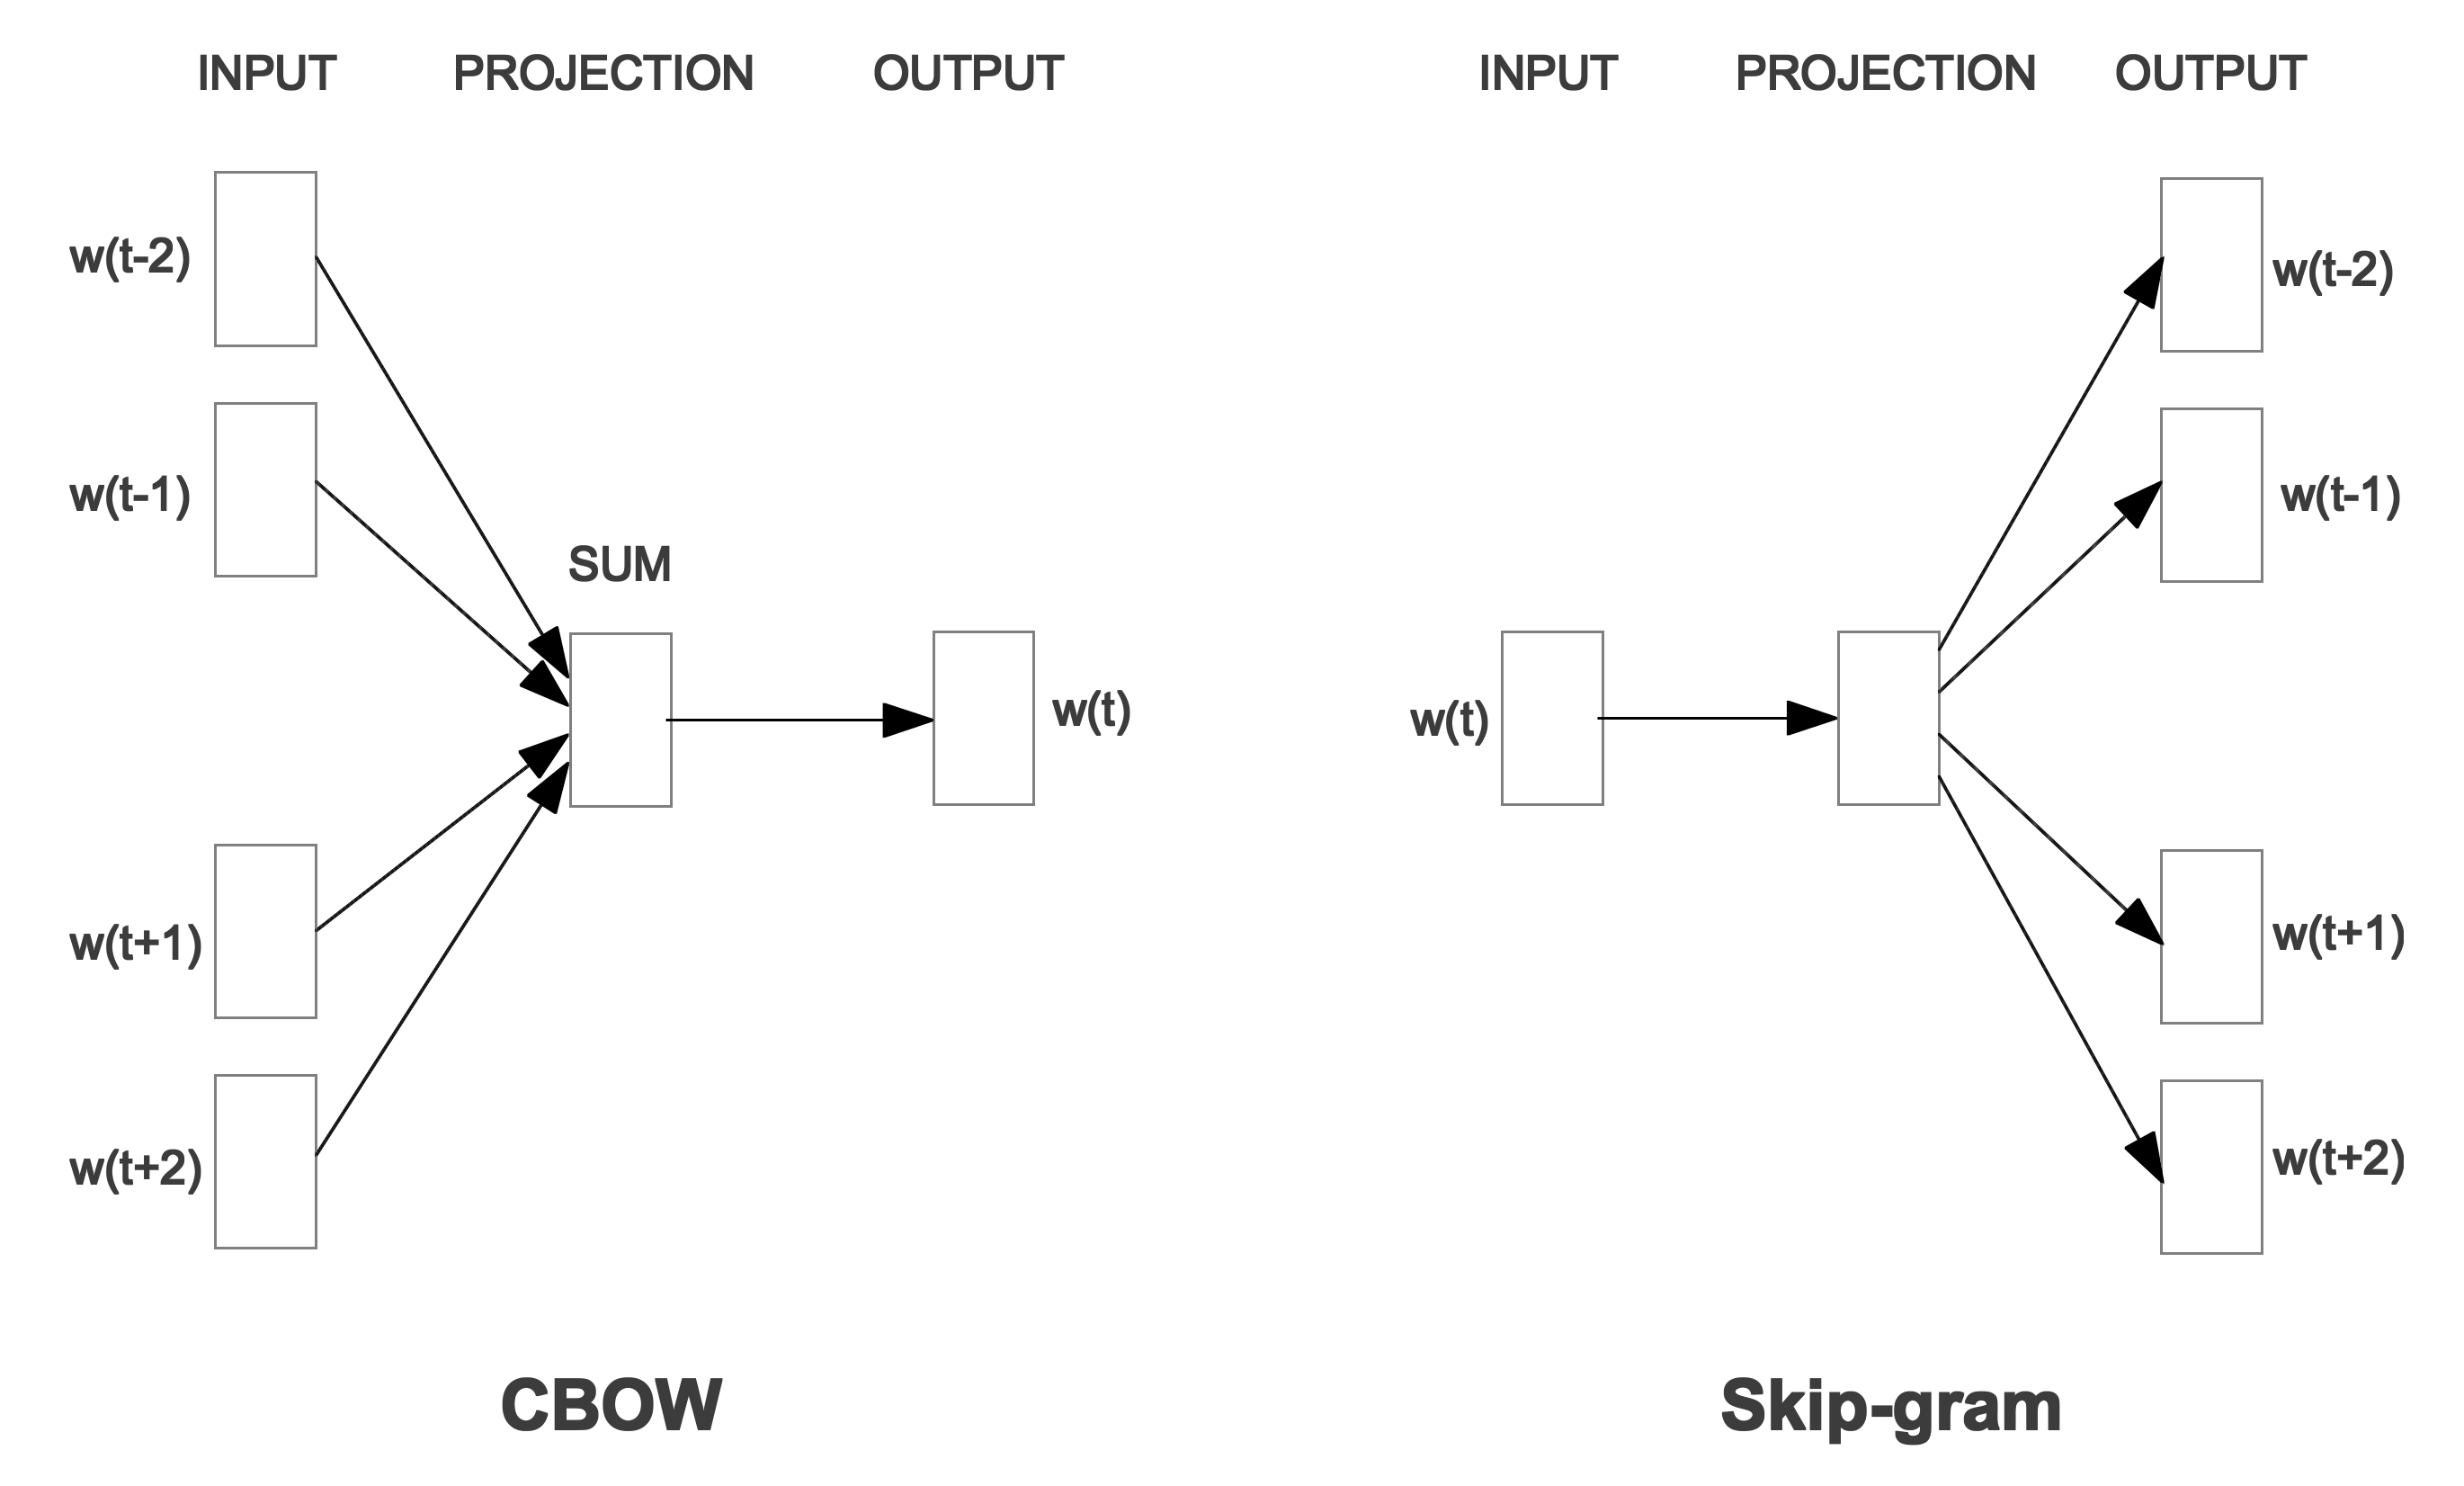

**Начала векторной семантики с нейронными сетями.**

Мы будем пользоваться библиотекой **gensim**, разработанной Радимом Рехуреком. Подробнее можно почитать здесь: https://radimrehurek.com/gensim/  
Там же есть очень человечные тьюториалы.

In [ ]:
import gensim
#не забудьте про pip install gensim, если у вас его нет
#Если выдает ошибку, то попробуйте ввести в командную строку сначала
#pip install scipy==1.12

Для начала перейдем на сайт проекта **RusVectores** и немного поразвлекаемся там: https://rusvectores.org/en/

Вернемся к генсиму. На вход модели нужно подать корпус. Проделаем все, что делали выше (и больше), поработав с Иваном Сергеевичем Аксаковым. Пока сделаем простейшую модель.

In [ ]:
path = 'AksakovIS\\'
corpus = []
for filename in tqdm(os.listdir(path)):
    with open(path + filename, encoding='utf-8') as txt:
        text = txt.read()
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'[^А-Яа-я -]', '', text.lower())
        text = [morph.parse(token)[0].normal_form for token in word_tokenize(text) if token not in stopwords_ru and len(token) > 2]
        corpus.append(text)

In [ ]:
%%time
w2v = gensim.models.Word2Vec(corpus)

In [ ]:
vocab_len = len(w2v.wv)
vocab_len

In [ ]:
w2v.wv.most_similar('письмо')

Можно указать те слова, которые вас не интересуют:

In [ ]:
w2v.wv.most_similar('письмо', negative=['почта'])

In [ ]:
w2v.wv.most_similar('депеша')

In [ ]:
w2v.wv.most_similar('мать')

In [ ]:
w2v.wv.most_similar('отец')

In [ ]:
w2v.wv.most_similar('собака')

**Задание 3.** Обучите ещё одну модель (на Белинском). Выберите 5-10 интересных (на ваш взгляд) существительных. Сравните семантические ассоциаты у Аксакова и Белинского. Аксаков был славянофилом, а Белинский — западником. Попробуйте столкнуть их идеи!

In [ ]:
#ваш код здесь

На самом деле обучение модели можно поднастроить. Есть несколько атрибутов:

**vector_size** — размер вектора (по умолчанию 100, в среднем ставят 100-1000);  
**min_count** — минимальная частота слова в корпусе (по умолчанию 5);  
**max_vocab_size** — максимальный размер словаря (по умолчанию ограничений нет);  
**window** — размер окна (по умолчанию 5);  
**epochs** — количество эпох (по умолчанию 5, полных итераций по корпусу);  

*class gensim.models.word2vec.Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)*

Поменяем немного модель. Посмотрим, что получится:

In [ ]:
%%time
w2v = gensim.models.Word2Vec(corpus, min_count=10, window=10)

Как видно, размер словаря изменился:

In [ ]:
vocab_len = len(w2v.wv)
vocab_len

Как и ассоциаты:

In [ ]:
w2v.wv.most_similar('письмо')

Также есть атрибут sg, в котором выбирается модель скипграмм или CBOW. 0 — CBOW, 1 - skipgram. (по умолчанию CBOW).

**Задание 4.** Обучите заново модели Аксакова и Белинского, сравните результаты по CBOW и скипграммам. Меняются ли значения? Меняются ли значения из-за размеров векторов и других параметров?

In [ ]:
#ваш код здесь